In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
x = np.arange(-5.0,5.0,0.1)
y = 2*(x)+3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

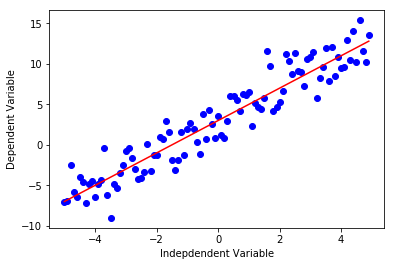

In [20]:
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [24]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1*(x**3)+1*(x**2)+1*(x)+3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

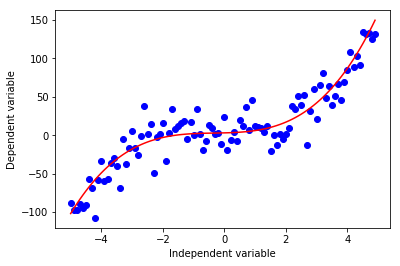

In [25]:
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.ylabel('Dependent variable')
plt.xlabel('Independent variable')
plt.show()

In [28]:
x = np.arange(-5.0,5.0,0.1)
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

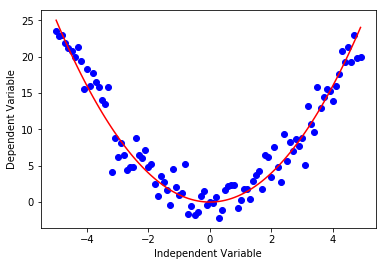

In [29]:
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

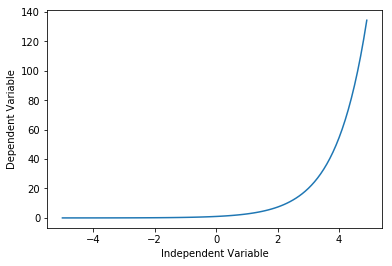

In [31]:
x = np.arange(-5.0,5.0,0.1)
y = np.exp(x)
plt.plot(x,y)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

c:\users\karthik.vullam\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


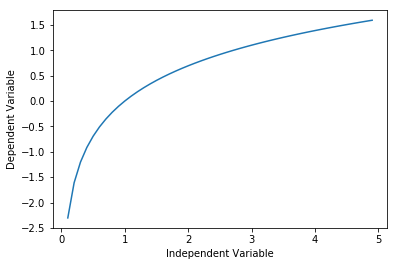

In [32]:
x = np.arange(-5.0,5.0,0.1)
y = np.log(x)
plt.plot(x,y)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

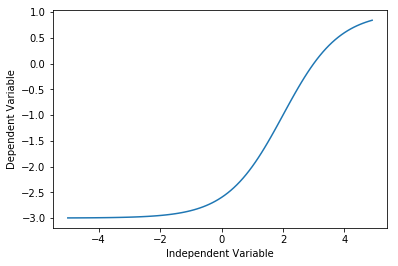

In [33]:
x = np.arange(-5.0,5.0,0.1)
y = 1-4/(1+np.power(3, x-2))
plt.plot(x,y)
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.show()

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [36]:
x_data, y_data = [df['Year'].values, df['Value'].values]

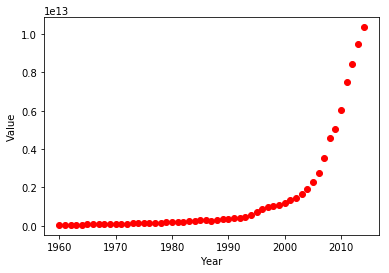

In [38]:
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Value')
plt.xlabel('Year')
plt.show()

In [39]:
x = np.arange(-5.0,5.0,0.1)
y = 1.0 / (1.0+np.exp(-x))

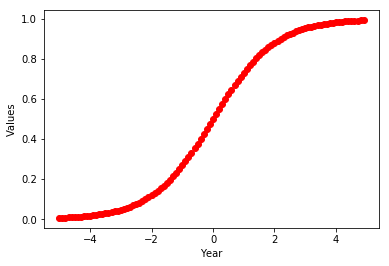

In [40]:
plt.plot(x,y,'ro')
plt.ylabel('Values')
plt.xlabel('Year')
plt.show()

In [45]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

In [46]:
Beta_1 = 0.10
Beta_2 = 1990.0
y_pred = sigmoid(x_data, Beta_1, Beta_2)

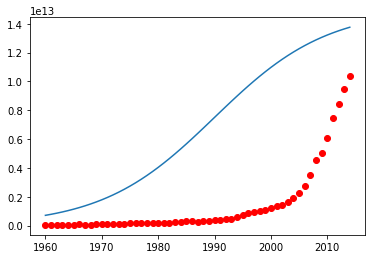

In [48]:
plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [49]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [50]:
from scipy.optimize import curve_fit
popt, pconv = curve_fit(sigmoid, xdata, ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


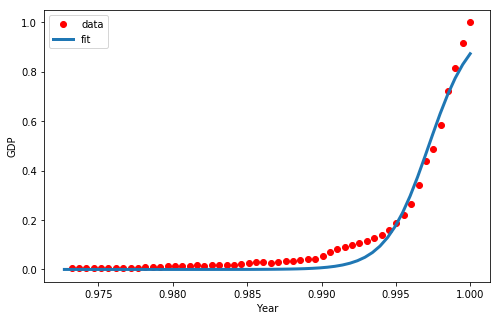

In [58]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [59]:
mask = np.random.rand(len(df))<0.8
train_x, train_y, test_x, test_y = xdata[mask], ydata[mask], xdata[~mask], ydata[~mask]

In [62]:
popt, pconv = curve_fit(sigmoid, train_x, train_y)

In [66]:
y_pred = sigmoid(test_x, *popt)

In [68]:
from sklearn.metrics import r2_score
print("r2 score: %.2f" %r2_score(y_pred, test_y))

r2 score: 0.97


In [69]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
